# Angabe Gruppenprojekte
Dieses Projekt kann in Gruppen von 2 bis 3 Personen bearbeitet werden. Die Abgabe der Projektarbeit erfolgt via Sakai (siehe Sakai bzgl. Deadline). Ihr könnt dort direkt einen Export eures Jupyter-Notebooks abgeben. Alternativ kann auch ein Link zum Github-Repo, in dem ihr gearbeitet habt, abgegeben werden. In diesem Fall muss aber sichergestellt sein, dass das Repo öffentlich zugänglich ist.

## Szenario
Wir wurden vom botanischen Garten in Innsbruck damit beauftragt, ein Klassifikationsmodell für Iris-Pflanzen zu erstellen. Dazu stellt uns der botanische Garten Daten über 150 Iris-Pflanzen zur Verfügung, die in den vergangenen Jahren gesammelt wurden. Wir erhalten folgende Werte für jede Pflanze:

* ``instant``: fortlaufende Nummer
* ``sepal_length_cm``: Länge der Sepal-Blätter
* ``sepal_width_cm``: Breite der Sepal-Blätter
* ``petal_length_cm``: Länge der Petal-Blätter
* ``petal_width_cm``: Breite der Petal-Blätter
* ``species``: Gattung der Iris-Pflanze

# Aufgaben
## Explorative Datenanalyse

In [22]:
from pandas import read_csv
from matplotlib import pyplot as plt
import seaborn as sns

* Führt eine geeignete, statistische Gesamtauswertung aller nummerischer Features des Datensatzes durch.

In [ ]:
data = read_csv("../data/iris.csv")

# select_dtypes ermöglicht die Auswahl des Datentyps
data.select_dtypes(include="number").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          150 non-null    int64  
 1   sepal_length_cm  150 non-null    float64
 2   sepal_width_cm   150 non-null    float64
 3   petal_length_cm  150 non-null    float64
 4   petal_width_cm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
data.describe()

,instant,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


* Wertet das Feature ``sepal_length_cm`` genauer aus. Entwickelt dazu einen geeigneten Plot um die Verteilung des Features darzustellen. Wertet außerdem zwei sinnvolle nummerische Darstellungen zu diesem Merkmal aus.

In [14]:
data["sepal_length_cm"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length_cm, dtype: float64

<Axes: >

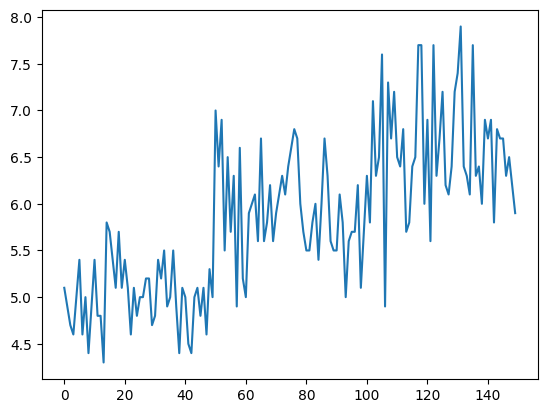

In [15]:
data["sepal_length_cm"].plot(kind="line")

<Axes: ylabel='Frequency'>

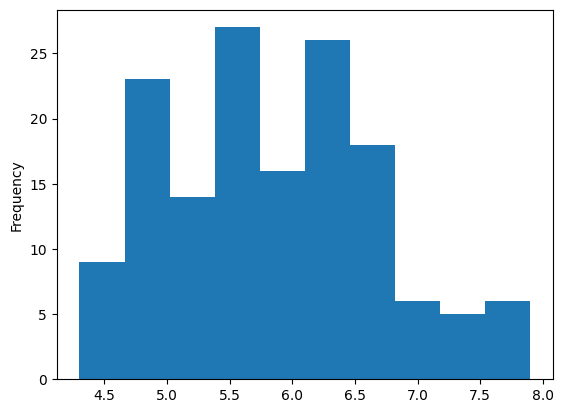

In [17]:
data["sepal_length_cm"].plot(kind="hist")

* Wertet die Features ``sepal_length_cm`` und ``petal_length_cm`` genauer aus und untersuche die gemeinsame Bewegung der beiden

In [28]:
data[["sepal_length_cm", "petal_length_cm"]].describe()

,sepal_length_cm,petal_length_cm
count,150.000000,150.000000
mean,5.843333,3.758000
std,0.828066,1.765298
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


<Axes: >

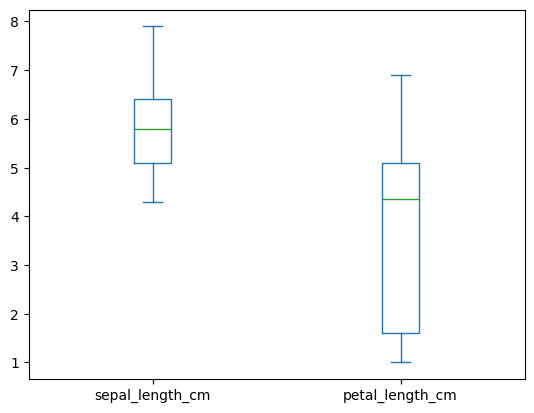

In [19]:
data[["sepal_length_cm", "petal_length_cm"]].plot(kind="box")

<Axes: >

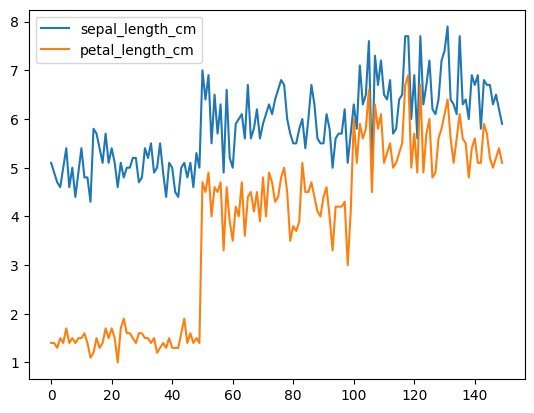

In [20]:
data[["sepal_length_cm", "petal_length_cm"]].plot(kind="line")

* Führt eine Korrelationsanalyse aller nummerischen Merkmale durch und stellt diese in einem geeigneten Plot dar.

<Axes: >

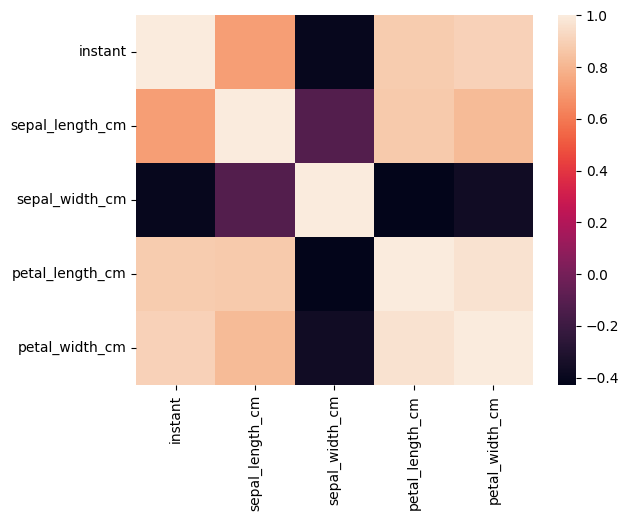

In [23]:
sns.heatmap(
    data.select_dtypes(include="number").corr()
)

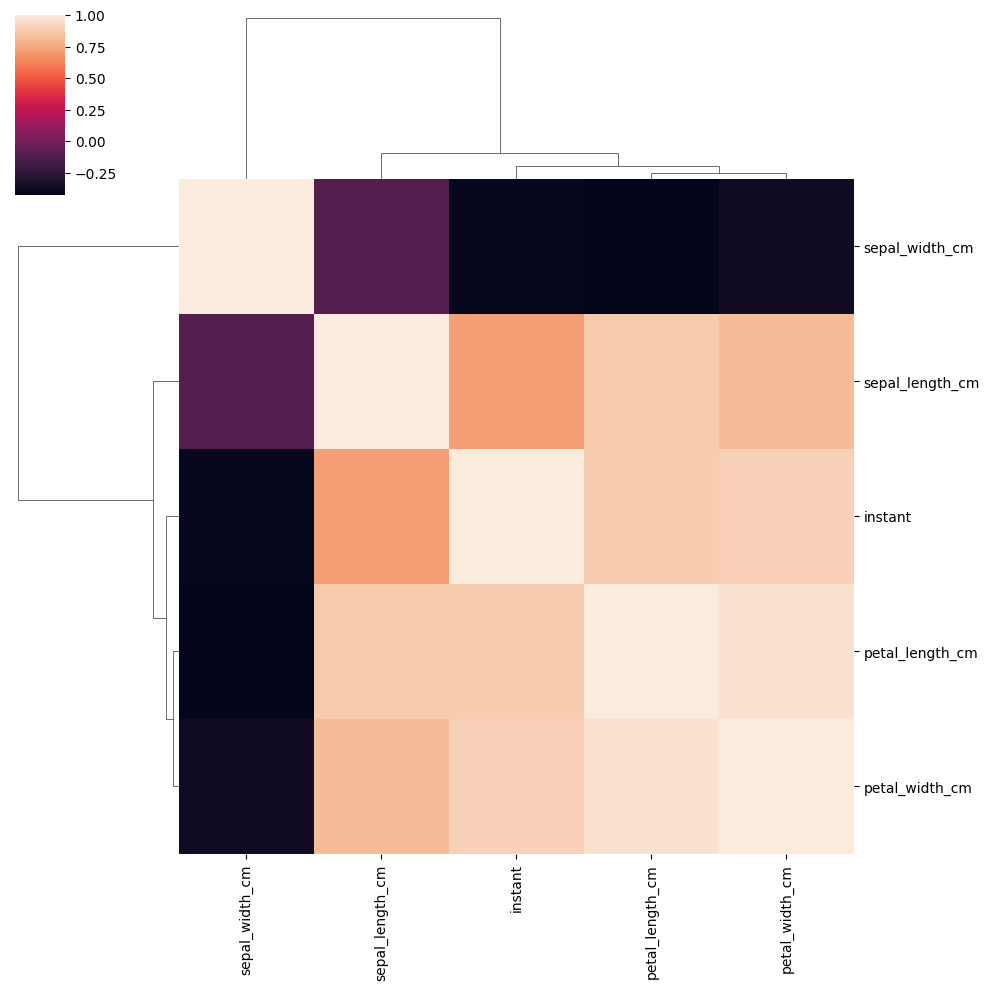

In [24]:
sns.clustermap(
    data.select_dtypes(include="number").corr()
)

* Erstellt einen Pairplot aller nummerischen Merkmale im Datenset.

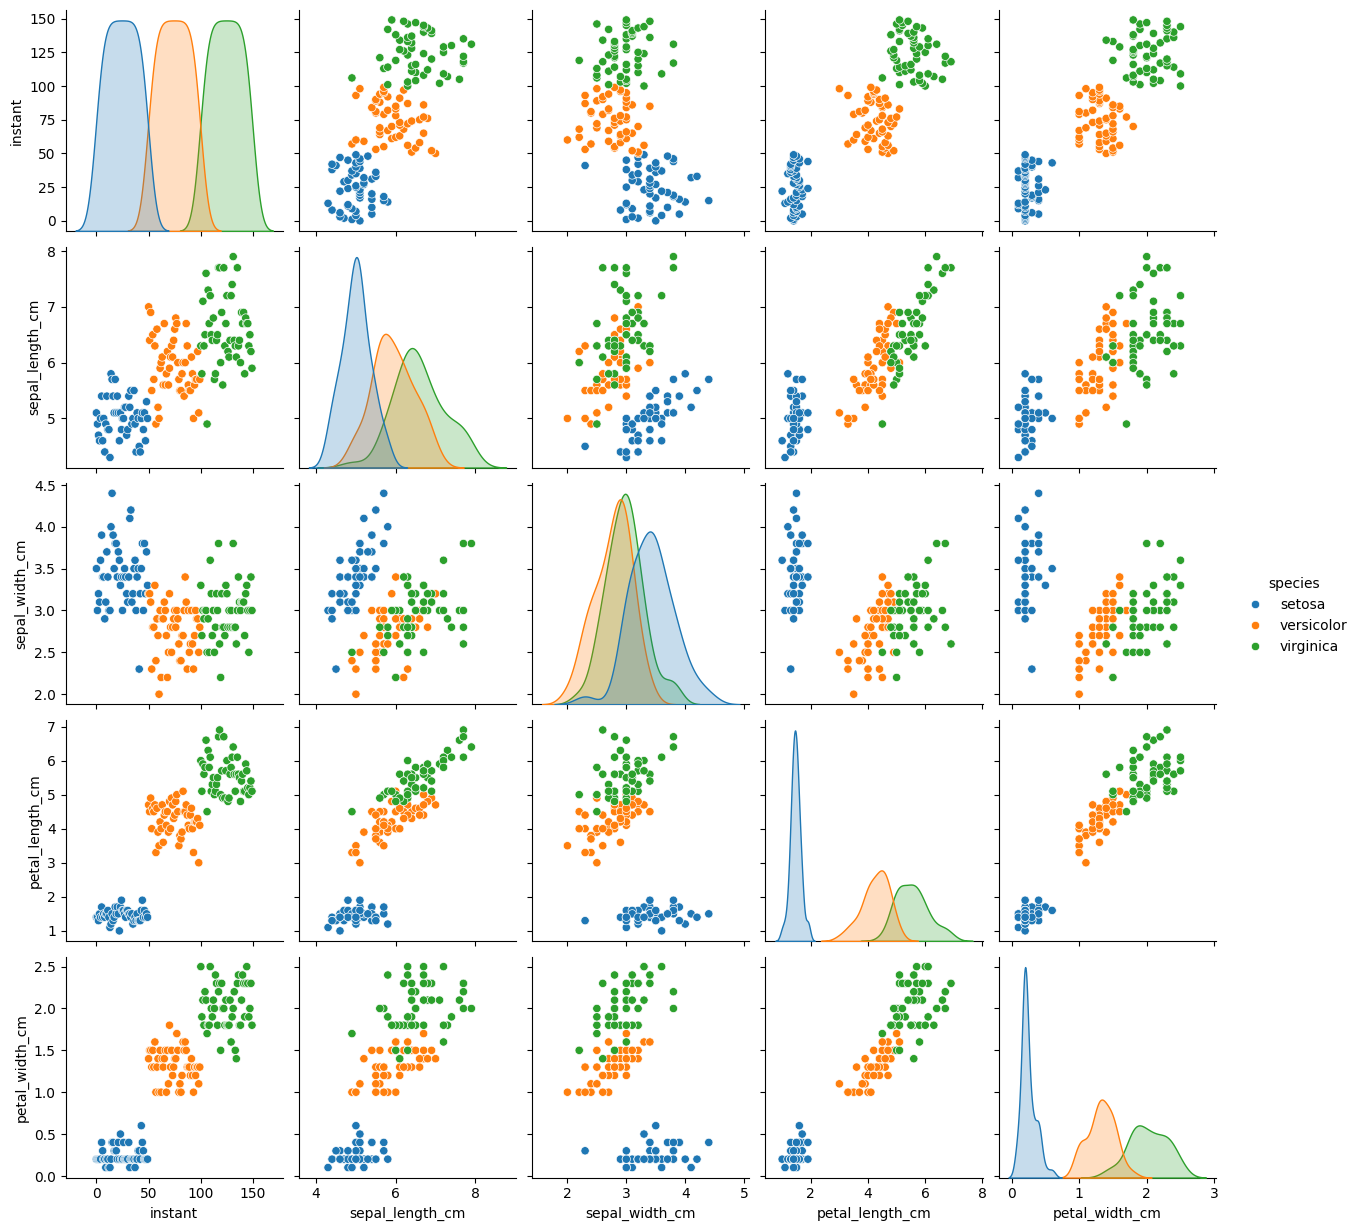

In [27]:
sns.pairplot(
    data, 
    hue="species"
)

* Interpretiert eure Darstellungen und Auswertungen aus den oberhalb ausgeführten Punkten schriftlich.

Die Analyse zeigt, dass besonders die Merkmale petal_length_cm und petal_width_cm eine hohe Varianz und starke Korrelationen aufweisen – insbesondere zueinander (r ≈ 0.96). Das Merkmal sepal_length_cm ist weitgehend symmetrisch verteilt (Mittelwert ≈ 5.84 cm) und korreliert stark mit petal_length_cm (r ≈ 0.87). Iris setosa lässt sich in fast allen Diagrammen klar von den anderen Arten trennen. Die Arten versicolor und virginica überlappen teilweise, zeigen aber mit Petal-Merkmalen eine gute Trennbarkeit. Insgesamt deuten die Ergebnisse darauf hin, dass die Petal-Merkmale für die spätere Klassifikation am aussagekräftigsten sind.

## Unsupervised Learning

In [50]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

In [58]:
feature = [
    "sepal_length_cm", 
    "sepal_width_cm",
    "petal_length_cm",
    "petal_width_cm"
]

X = data[feature]

* Erstellt mit Hilfe von ``scipy`` ein Dendrogram der gegebenen Daten. Verwendet dazu die Merkmale ``sepal_length_cm``, ``sepal_width_cm``, ``petal_length_cm`` und ``petal_width_cm``. Ermittelt daraus eine Schätzung für die Clusterzahl.

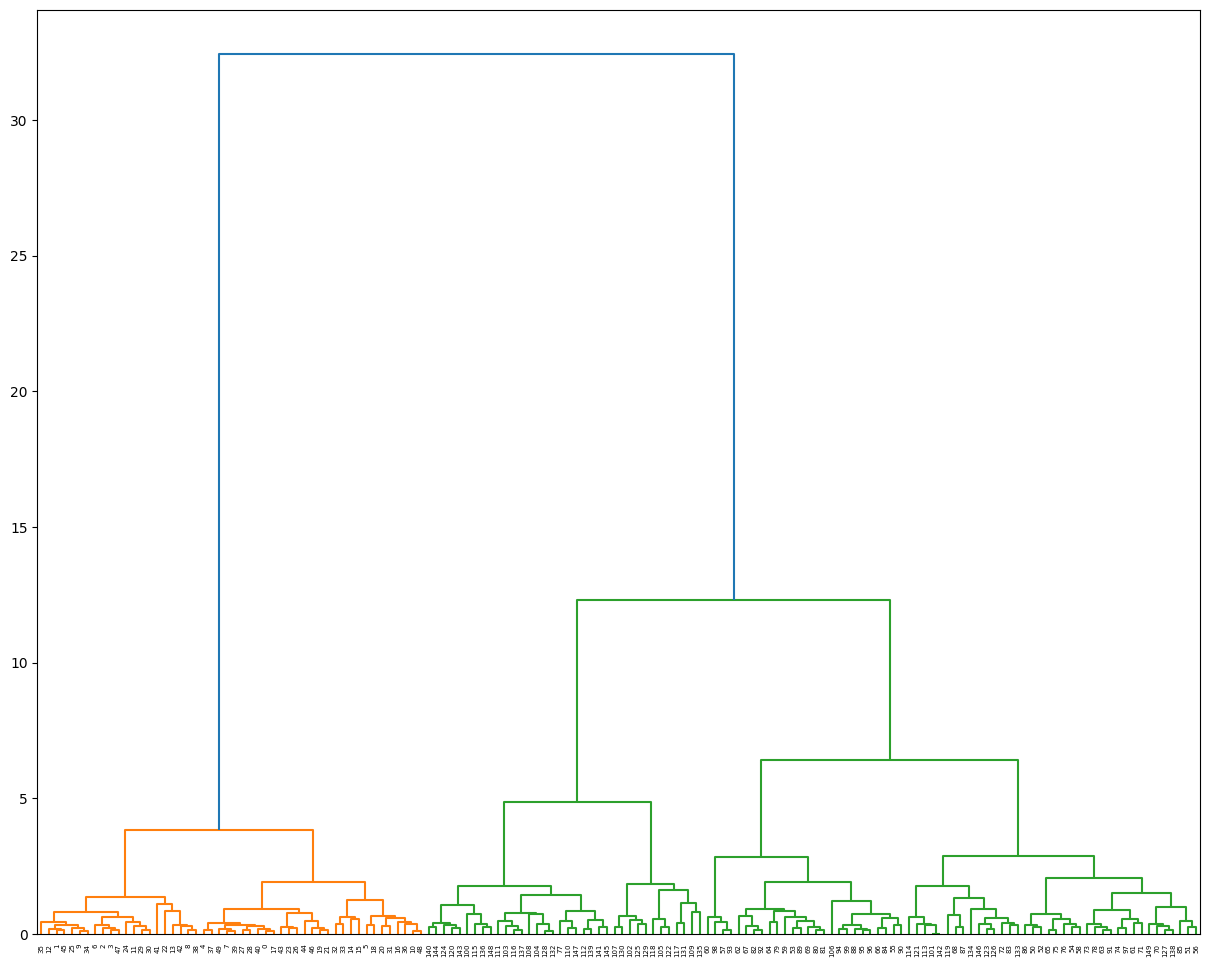

In [52]:
distances = hierarchy.linkage(X, method="ward")
plt.figure(figsize=(15,12))
hierarchy.dendrogram(distances)
plt.show()

Im Dendrogramm werden die Ähnlichkeiten zwischen den Iris-Daten visuell dargestellt. Je höher eine Verbindung im Diagramm erfolgt, desto größer ist der Unterschied zwischen den zusammengefügten Gruppen. Um die Anzahl sinnvoller Cluster zu bestimmen, zieht man gedanklich eine horizontale Linie im oberen Bereich des Dendrogramms – möglichst dort, wo ein großer vertikaler Abstand zwischen den Verzweigungen sichtbar ist. Die Anzahl der Äste, die von dieser Linie geschnitten werden, entspricht der geschätzten Clusteranzahl. Im Fall der Iris-Daten erkennt man deutlich drei Hauptäste, was auf **drei natürliche Cluster** hindeutet – passend zur tatsächlichen Anzahl der Iris-Arten (*setosa*, *versicolor*, *virginica*).

* Führt eine Clusteranalyse mit den Merkmalen ``sepal_length_cm``, ``sepal_width_cm``, ``petal_length_cm`` und ``petal_width_cm`` durch. Verwendet dazu zwei geeignete Clusteralgorithmen aus ``scikit-learn``.

In [54]:
kmeans_engine = KMeans(n_clusters=3)
kmeans_engine.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

<Axes: xlabel='petal_length_cm', ylabel='petal_width_cm'>

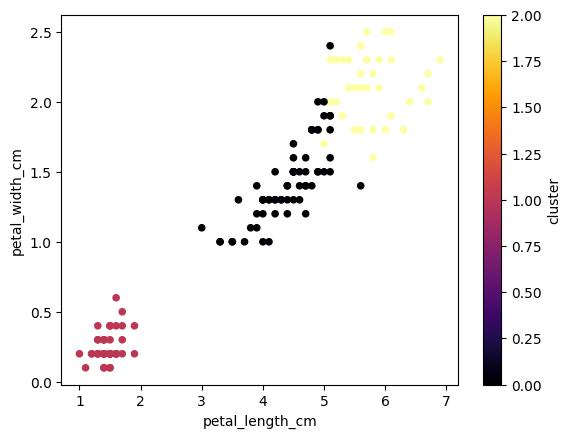

In [57]:
hierarchical_engine = AgglomerativeClustering(n_clusters=3)
clusters = hierarchical_engine.fit_predict(X)
df = data.copy()
df["cluster"] = clusters

df.plot(
    kind="scatter",
    x="petal_length_cm", 
    y="petal_width_cm",
    c="cluster",
    cmap="inferno"
)

* Interpretiert eure Clusteringergebnisse.

Die durchgeführte Clusteranalyse mit den Merkmalen sepal_length_cm, sepal_width_cm, petal_length_cm und petal_width_cm zeigt, dass die Iris-Daten sinnvoll in drei Gruppen eingeteilt werden können. Dies wurde sowohl durch das Dendrogramm (hierarchisches Clustering) als auch durch das KMeans-Verfahren bestätigt. Die Anzahl von drei Clustern stimmt gut mit der tatsächlichen Anzahl der Iris-Arten (setosa, versicolor, virginica) überein.

Besonders deutlich wird die Trennung, wenn man die Clusterergebnisse im Scatterplot der Merkmale petal_length_cm und petal_width_cm visualisiert. Hier ist Iris setosa (rot) klar separierbar, während versicolor und virginica teils überlappen, aber dennoch als eigene Gruppen erkennbar bleiben. 

## Supervised Learning

In [70]:
# Transformer/Funktionen zur Vorverarbeitung
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Estimators für die Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Metriken für die Regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

* Bereitet die Daten für's Machine Learning vor (``X``/``y``, ``train``/``test``).

In [66]:
feature = [
    "sepal_length_cm", 
    "sepal_width_cm",
    "petal_length_cm",
    "petal_width_cm"
]

target = ["species"]

X = data[feature]
y = data[target]

species_encoder_engine = LabelEncoder()
y.loc[:, "species"] = species_encoder_engine.fit_transform(y["species"])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2
)

* Trainiert zwei unterschiedliche Machine Learning Modelle unter Zuhilfenahme passender ``scikit-learn`` Algorithmen.
* Evaluiert eure Modelle mit geeigneten Metriken. Verwendet dazu zumindest 3 unterschiedliche Metriken.

In [67]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

predictions = linear_model.predict(X_test)

print(
    "R²", r2_score(y_test, predictions),
    "RMSE", root_mean_squared_error(y_test, predictions),
    "MAE", mean_absolute_error(y_test, predictions)
)

R² 0.8876964653793099 RMSE 0.24600635558870942 MAE 0.2086716714674225


In [69]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)

print(
    "R²", r2_score(y_test, predictions),
    "RMSE", root_mean_squared_error(y_test, predictions),
    "MAE", mean_absolute_error(y_test, predictions)
)

R² 1.0 RMSE 0.0 MAE 0.0


* Interpretiert eure Ergebnisse.

Im Supervised Learning wurden zwei Modelle trainiert: ein Linear Regression Modell und ein Decision Tree Regressor. Beide Modelle lieferten sehr gute Ergebnisse und konnten die Iris-Arten auf Basis der vier Merkmale zuverlässig voneinander unterscheiden. Während das lineare Modell bereits eine solide Vorhersage erreichte, zeigte sich der Decision Tree als besonders effektiv.

Der Decision Tree Regressor klassifizierte die Iris-Arten mit 100 % Genauigkeit auf den Testdaten. Das bedeutet, dass für jede Eingabe die korrekte Iris-Art vorhergesagt wurde. Dieses Ergebnis zeigt, dass Entscheidungsbäume sehr gut mit der Struktur und den Trennlinien im Iris-Datensatz umgehen können – insbesondere, da sich die Arten über bestimmte Schwellenwerte der Blütenmaße gut unterscheiden lassen.

Insgesamt sind beide Modelle leistungsstark, doch der Decision Tree ist für diese Aufgabe besonders geeignet und liefert das beste Ergebnis.